<a href="https://www.kaggle.com/code/ridhanf/ann-from-scratch?scriptVersionId=98702494" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [90]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


# This notebook is NOT ORIGINAL
Source https://www.kaggle.com/code/wwsalmon/simple-mnist-nn-from-scratch-numpy-no-tf-keras/notebook

In [91]:
from matplotlib import pyplot as plt

In [92]:
data = pd.read_csv("../input/digit-recognizer/train.csv")

In [93]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255
_,m_train = X_train.shape

In [95]:
Y_train

array([3, 0, 1, ..., 1, 3, 7])

In [96]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [97]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations+1):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 50 == 0:
            print("Iteration\t: ", i)
            predictions = get_predictions(A2)
            print("Accuracy\t:", get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [98]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration	:  0
[1 2 1 ... 1 1 1] [3 0 1 ... 1 3 7]
Accuracy	: 0.11548780487804879
Iteration	:  50
[1 0 1 ... 1 3 7] [3 0 1 ... 1 3 7]
Accuracy	: 0.5481219512195122
Iteration	:  100
[3 0 1 ... 1 3 7] [3 0 1 ... 1 3 7]
Accuracy	: 0.6586585365853659
Iteration	:  150
[3 0 1 ... 1 3 7] [3 0 1 ... 1 3 7]
Accuracy	: 0.7127073170731707
Iteration	:  200
[3 0 1 ... 1 3 7] [3 0 1 ... 1 3 7]
Accuracy	: 0.7472682926829268
Iteration	:  250
[3 0 1 ... 1 3 7] [3 0 1 ... 1 3 7]
Accuracy	: 0.7717560975609756
Iteration	:  300
[3 0 1 ... 1 3 7] [3 0 1 ... 1 3 7]
Accuracy	: 0.7913170731707317
Iteration	:  350
[3 0 1 ... 1 3 7] [3 0 1 ... 1 3 7]
Accuracy	: 0.8066341463414635
Iteration	:  400
[3 0 1 ... 1 3 7] [3 0 1 ... 1 3 7]
Accuracy	: 0.8183414634146341
Iteration	:  450
[3 0 1 ... 1 3 7] [3 0 1 ... 1 3 7]
Accuracy	: 0.8278292682926829
Iteration	:  500
[3 0 1 ... 1 3 7] [3 0 1 ... 1 3 7]
Accuracy	: 0.8364390243902439


In [99]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [3]
Label:  3


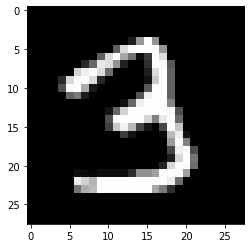

Prediction:  [0]
Label:  0


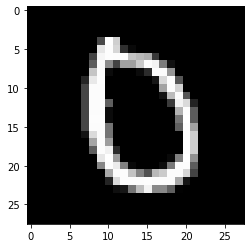

Prediction:  [1]
Label:  1


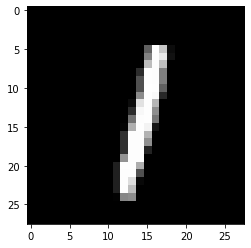

Prediction:  [9]
Label:  9


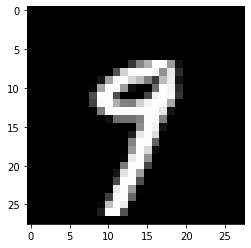

In [100]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [101]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[0 1 4 1 9 4 8 8 5 2 1 0 5 2 3 8 2 4 1 5 9 1 6 1 1 6 4 7 9 2 4 0 7 6 9 4 3
 6 2 3 9 2 1 4 3 5 0 1 5 6 0 3 3 0 1 0 6 0 0 5 5 4 5 1 8 2 7 9 9 4 4 0 2 2
 7 8 4 6 8 6 9 0 8 0 1 0 1 1 8 6 8 5 1 5 2 9 4 9 6 5 0 1 1 9 8 2 7 3 0 9 0
 7 5 0 7 8 9 3 5 3 3 1 9 7 5 4 1 7 3 4 9 7 6 0 7 6 3 7 2 6 6 5 1 7 8 3 4 1
 4 7 9 2 9 6 8 1 4 1 2 1 3 5 9 8 1 0 9 9 5 3 8 2 2 2 2 0 1 4 7 8 2 7 2 9 5
 1 5 5 4 1 2 4 2 2 3 4 4 6 3 7 2 8 3 2 0 7 4 8 4 9 8 9 2 5 0 7 0 1 1 6 0 1
 8 3 6 4 5 3 4 9 1 3 7 1 0 0 3 6 3 0 3 6 7 1 9 8 9 9 7 3 1 1 7 3 9 7 0 8 7
 4 8 1 9 7 1 0 5 7 9 4 6 9 9 1 1 7 2 4 6 1 1 1 1 6 1 9 6 3 1 8 1 3 0 1 1 8
 3 7 0 4 1 9 3 7 4 5 8 4 1 2 3 7 9 9 1 1 6 6 7 8 1 1 5 7 7 1 0 3 3 5 4 2 7
 3 2 5 4 2 0 7 6 2 7 5 7 0 3 3 0 7 6 8 1 6 4 2 0 6 4 3 3 6 0 2 9 3 1 5 9 9
 5 2 5 0 4 6 8 1 1 6 5 5 9 0 4 8 6 3 9 9 3 5 1 8 1 1 2 5 8 1 0 3 3 7 2 9 2
 9 4 7 3 8 9 9 2 4 7 7 3 4 3 1 7 0 1 9 6 8 1 3 3 2 5 0 4 7 0 5 2 1 6 4 5 1
 9 7 9 9 0 3 5 1 9 1 3 9 6 3 0 5 1 8 4 6 6 5 7 6 3 6 3 3 8 9 4 2 5 4 4 1 2
 0 5 6 8 7 7 2 9 7 8 2 9 

0.824

# END OF LINE